In [3]:
import cantera as ct

gas = ct.Solution('h2o2.yaml')
gas.TPX = 1001.0, ct.one_atm, 'H2:2,O2:1,N2:4'
r = ct.IdealGasConstPressureReactor(gas)

sim = ct.ReactorNet([r])
sim.verbose = True

# limit advance when temperature difference is exceeded
delta_T_max = 20.
r.set_advance_limit('temperature', delta_T_max)

dt_max = 1.e-5
t_end = 100 * dt_max
states = ct.SolutionArray(gas, extra=['t'])

print('{:10s} {:10s} {:10s} {:14s}'.format(
    't [s]', 'T [K]', 'P [Pa]', 'u [J/kg]'))
while sim.time < t_end:
    sim.advance(sim.time + dt_max)
    states.append(r.thermo.state, t=sim.time*1e3)
    print('{:10.3e} {:10.3f} {:10.3f} {:14.6f}'.format(
            sim.time, r.T, r.thermo.P, r.thermo.u))

Initializing reactor network.
Reactor 0: 12 variables.
              0 sensitivity params.
Number of equations: 12
Maximum time step:                0
t [s]      T [K]      P [Pa]     u [J/kg]      
 1.000e-05   1001.000 101325.000  620761.940774
 2.000e-05   1001.000 101325.000  620761.940024
 3.000e-05   1001.000 101325.000  620761.937443
 4.000e-05   1001.000 101325.000  620761.932033
 5.000e-05   1001.000 101325.000  620761.922251
 6.000e-05   1001.000 101325.000  620761.905712
 7.000e-05   1001.000 101325.000  620761.878725
 8.000e-05   1001.000 101325.000  620761.835580
 9.000e-05   1001.001 101325.000  620761.767437
 1.000e-04   1001.001 101325.000  620761.660607
 1.100e-04   1001.001 101325.000  620761.493864
 1.200e-04   1001.002 101325.000  620761.234248
 1.300e-04   1001.003 101325.000  620760.830463
 1.400e-04   1001.005 101325.000  620760.202386
 1.500e-04   1001.008 101325.000  620759.224189
 1.600e-04   1001.012 101325.000  620757.696642
 1.700e-04   1001.019 101325.000 

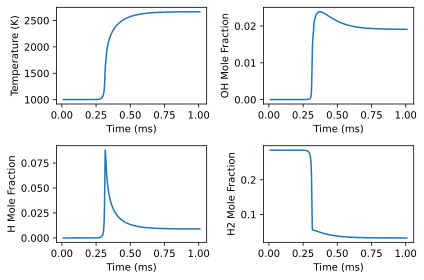

In [2]:
%config InlineBackend.figure_formats = ["svg"]
%matplotlib inline
import matplotlib.pylab as plt


plt.clf()
plt.subplot(2, 2, 1)
plt.plot(states.t, states.T)
plt.xlabel('Time (ms)')
plt.ylabel('Temperature (K)')
plt.subplot(2, 2, 2)
plt.plot(states.t, states.X[:, gas.species_index('OH')])
plt.xlabel('Time (ms)')
plt.ylabel('OH Mole Fraction')
plt.subplot(2, 2, 3)
plt.plot(states.t, states.X[:, gas.species_index('H')])
plt.xlabel('Time (ms)')
plt.ylabel('H Mole Fraction')
plt.subplot(2, 2, 4)
plt.plot(states.t, states.X[:, gas.species_index('H2')])
plt.xlabel('Time (ms)')
plt.ylabel('H2 Mole Fraction')
plt.tight_layout()
plt.show()